# Linear Regression II

In this Lab, firstly, you will see how to use a linear model to fit nonlinear data by adding powers of each feature as new features, (This lab is designed based the notebook https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb from Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow); Secondly, you will study how to split a dataset into a training set and a testing set and how to process your data.  Thirdly, you will explore using scikit-learn to implement your regression model for the house price prediction task and evaluate your model properly. 

#### Important Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Polynomial Regression and Overfitting

In [3]:
import numpy.random as rnd
np.random.seed(42)

#### Generating some nonlinear data, based on a simple quadratic equation $y=ax^2+bx+c$ (plus some noise)

In [4]:
m = 15
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

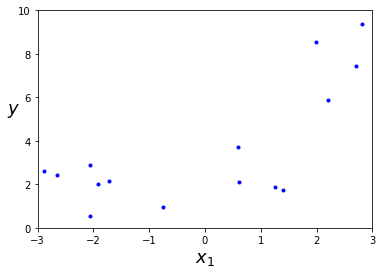

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

#### Adding the square of each feature (Two-degree)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433],
       [-2.06403288,  4.26023172],
       [-2.65149833,  7.03044338],
       [ 2.19705687,  4.82705891],
       [ 0.60669007,  0.36807284],
       [ 1.24843547,  1.55859111],
       [-2.87649303,  8.27421218],
       [ 2.81945911,  7.94934969],
       [ 1.99465584,  3.97865194],
       [-1.72596534,  2.97895634],
       [-1.9090502 ,  3.64447265]])

#### Using this extended data to train a linear regression model 


In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.47043391]), array([[1.00853419, 0.55250413]]))

#### Visualizing polynomial regression model predictions

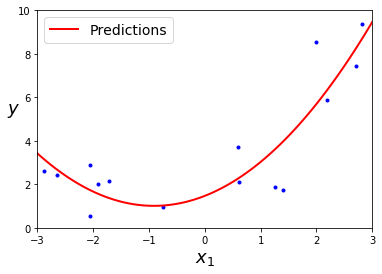

In [63]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

#### Adding a higher degree to see the overfitting issue

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 15), ("b--", 2, 2), ("r-+", 2, 1)):
    poly_big_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scalar = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", poly_big_features),
            ("std_scalar", std_scalar),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_new_big = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_new_big, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

NameError: name 'X_new' is not defined

#### TODO Overfitting I
Trying Polynomial regression with different degrees, such as with three-degree, four-degree etc, and find when the overfitting issue arose.


#### TODO Overfitting II
Generating more data and repeat the previous steps to see whether increasing the amount of training data will help to avoid overfitting.

#### TODO Overfitting III
For a linear model, regularization is typically achieved by constraining the weights of the model. Using a regularized linear model (Lasso Regression) as an example and trying different values of the hyperparameter $\alpha$ and visualize these polynomial models.

In [65]:
# an example to use scikit-learn's Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.8 )
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.78837813])

## Testing and Validating

#### Using train_test_split to split your data into two sets: the training set and the test set.
Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simples function is train_test_split(). 

For example, in our previous experiment, there are 15 examples in our generated dataset, we can split 20% of them as the test data.

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

In [67]:
X_train.shape

(12, 1)

In [68]:
X_val.shape

(3, 1)

#### It can also split pandas dataframe into multiple subsets
We will import the house price prediction dataset (https://www.kaggle.com/harlfoxem/housesalesprediction) used in our previous lab. And then we will split them into the training set (80%) and the test set (20%). 

In [69]:
df = pd.read_csv("./Datasets/kc_house_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [70]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=10)

In [71]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 15949 to 17673
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  lo

In [72]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 957 to 9848
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4323 non-null   int64  
 1   date           4323 non-null   object 
 2   price          4323 non-null   float64
 3   bedrooms       4323 non-null   int64  
 4   bathrooms      4323 non-null   float64
 5   sqft_living    4323 non-null   int64  
 6   sqft_lot       4323 non-null   int64  
 7   floors         4323 non-null   float64
 8   waterfront     4323 non-null   int64  
 9   view           4323 non-null   int64  
 10  condition      4323 non-null   int64  
 11  grade          4323 non-null   int64  
 12  sqft_above     4323 non-null   int64  
 13  sqft_basement  4323 non-null   int64  
 14  yr_built       4323 non-null   int64  
 15  yr_renovated   4323 non-null   int64  
 16  zipcode        4323 non-null   int64  
 17  lat            4323 non-null   float64
 18  long  

#### TODO Splitting the data (House) into three parts 
Training set (70%), Validation Set (10%), and Test set (20%), Hints: you can use the <b>train_test_split</b> method twice.

#### Transformation Pipelines
Scikit-Learn provides the Pipeline class to help with processing your data, such as re-scale features, do one-hot encoding.

In [73]:
cols = ['sqft_living', 'bedrooms','bathrooms', 'zipcode', 'price']

df_moderate = df.loc[:,cols]
df_moderate['price'] = df_moderate['price'].div(1000.0)
df_moderate.head(5)

,sqft_living,bedrooms,bathrooms,zipcode,price
0,1180,3,1.00,98178,221.9
1,2570,3,2.25,98125,538.0
2,770,2,1.00,98028,180.0
3,1960,4,3.00,98136,604.0
4,1680,3,2.00,98074,510.0


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(['sqft_living','bedrooms','bathrooms'])
cat_attribs = ['zipcode']
num_pipeline = Pipeline([
    ('std_scalar',StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(df_moderate)

In [10]:
housing_prepared

NameError: name 'housing_prepared' is not defined

#### TODO Think about why the shape of housing_prepared is 21613 $\times$ 73?

HINTS: In the lecture, we talk about the one-hot encoding method for categorical features.

In [76]:
df_moderate.zipcode.value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

### TODO House Price Prediction

By utilizing the functions provided by Scikit-learn and using the knowledge we have learned so far to design a proper machine learning algorithm for house price prediction. You need to evaluate your model and make sure that your evaluation reflects real generalization error.